In [1]:
import pandas as pd
import numpy as np
 
# identify name of xlsx file (which will change when uploaded)
xlsx_filename = "Online Retail.xlsx"
 
# schema of the excel spreadsheet data range
orders_schema = {
  'InvoiceNo':str,
  'StockCode':str,
  'Description':str,
  'Quantity':np.int64,
  'InvoiceDate':np.datetime64,
  'UnitPrice':np.float64,
  'CustomerID':str,
  'Country':str  
  }
 
# read spreadsheet to pandas dataframe
# the xlrd library must be installed for this step to work 
orders_pd = pd.read_excel(
  xlsx_filename, 
  sheet_name='Online Retail',
  header=0, # first row is header
  dtype=orders_schema
  )
 
# display first few rows from the dataset
orders_pd.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [2]:
# calculate sales amount as quantity * unit price
orders_pd['SalesAmount'] = orders_pd['Quantity'] * orders_pd['UnitPrice']
 
orders_pd.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [3]:
import lifetimes
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# calculate the required customer metrics
metrics_pd = (
  lifetimes.utils.summary_data_from_transaction_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date, 
    freq='D',
    monetary_value_col='SalesAmount'  # use sales amount to determine monetary value
    )
  )
 
# display first few rows
metrics_pd.head(10)

,frequency,recency,T,monetary_value
CustomerID,,,,
12346,0.0,0.0,325.0,0.000000
12347,6.0,365.0,367.0,599.701667
12348,3.0,283.0,358.0,301.480000
12349,0.0,0.0,18.0,0.000000
12350,0.0,0.0,310.0,0.000000
12352,6.0,260.0,296.0,208.151667
12353,0.0,0.0,204.0,0.000000
12354,0.0,0.0,232.0,0.000000
12355,0.0,0.0,214.0,0.000000


In [4]:
from datetime import timedelta
 
# set the last transaction date as the end point for this historical dataset
current_date = orders_pd['InvoiceDate'].max()
 
# define end of calibration period
holdout_days = 90
calibration_end_date = current_date - timedelta(days = holdout_days)
 
# calculate the required customer metrics
metrics_cal_pd = (
  lifetimes.utils.calibration_and_holdout_data(
    orders_pd,
    customer_id_col='CustomerID',
    datetime_col='InvoiceDate',
    observation_period_end = current_date,
    calibration_period_end=calibration_end_date,
    freq='D',
    monetary_value_col='SalesAmount'  # use sales amount to determine monetary value
    )
  )
 
# display first few rows
metrics_cal_pd.head(10)

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
CustomerID,,,,,,,
12346,0.0,0.0,235.0,0.0000,0.0,0.000000,90.0
12347,4.0,238.0,277.0,519.7675,2.0,26.192069,90.0
12348,2.0,110.0,268.0,297.2200,1.0,103.333333,90.0
12350,0.0,0.0,220.0,0.0000,0.0,0.000000,90.0
12352,3.0,34.0,206.0,101.5600,3.0,20.090000,90.0
12353,0.0,0.0,114.0,0.0000,0.0,0.000000,90.0
12354,0.0,0.0,142.0,0.0000,0.0,0.000000,90.0
12355,0.0,0.0,124.0,0.0000,0.0,0.000000,90.0
12356,1.0,80.0,235.0,481.4600,1.0,29.175000,90.0


In [8]:
# remove customers with no repeats (complete dataset)
filtered = metrics_pd[metrics_pd['frequency'] > 0]
 
## remove customers with no repeats in calibration period
filtered_cal = metrics_cal_pd[metrics_cal_pd['frequency_cal'] > 0]

In [9]:
# exclude dates with negative totals (see note above) 
filtered = filtered.where(filtered.monetary_value > 0)
filtered_cal = filtered_cal.where(filtered_cal.monetary_value_cal > 0)

In [10]:
from hyperopt import hp, fmin, tpe, rand, SparkTrials, STATUS_OK, space_eval
 
from lifetimes.fitters.gamma_gamma_fitter import GammaGammaFitter
 
# define search space
search_space = hp.uniform('l2', 0.0, 1.0)
 
# evaluation function
def score_model(actuals, predicted, metric='mse'):
  # make sure metric name is lower case
  metric = metric.lower()
  
  # Mean Squared Error and Root Mean Squared Error
  if metric=='mse' or metric=='rmse':
    val = np.sum(np.square(actuals-predicted))/actuals.shape[0]
    if metric=='rmse':
        val = np.sqrt(val)
  
  # Mean Absolute Error
  elif metric=='mae':
    np.sum(np.abs(actuals-predicted))/actuals.shape[0]
  
  else:
    val = None
  
  return val
 
# define function for model training and evaluation
def evaluate_model(param):
  
  # accesss replicated input_pd dataframe
  data = inputs.value
  
  # retrieve incoming parameters
  l2_reg = param
  
  # instantiate and configure the model
  model = GammaGammaFitter(penalizer_coef=l2_reg)
  
  # fit the model
  model.fit(data['frequency_cal'], data['monetary_value_cal'])
  
  # evaluate the model
  monetary_actual = data['monetary_value_holdout']
  monetary_predicted = model.conditional_expected_average_profit(data['frequency_holdout'], data['monetary_value_holdout'])
  mse = score_model(monetary_actual, monetary_predicted, 'mse')
  
  # return score and status
  return {'loss': mse, 'status': STATUS_OK}

In [19]:
# evaluate the model
input_pd = filtered_cal
monetary_actual = input_pd['monetary_value_holdout']
monetary_predicted = spend_model.conditional_expected_average_profit(input_pd['frequency_holdout'], input_pd['monetary_value_holdout'])
mse = score_model(monetary_actual, monetary_predicted, 'mse')
 
print('MSE: {0}'.format(mse))

NameError: name 'spend_model' is not defined

NameError: name 'monetary_predicted' is not defined

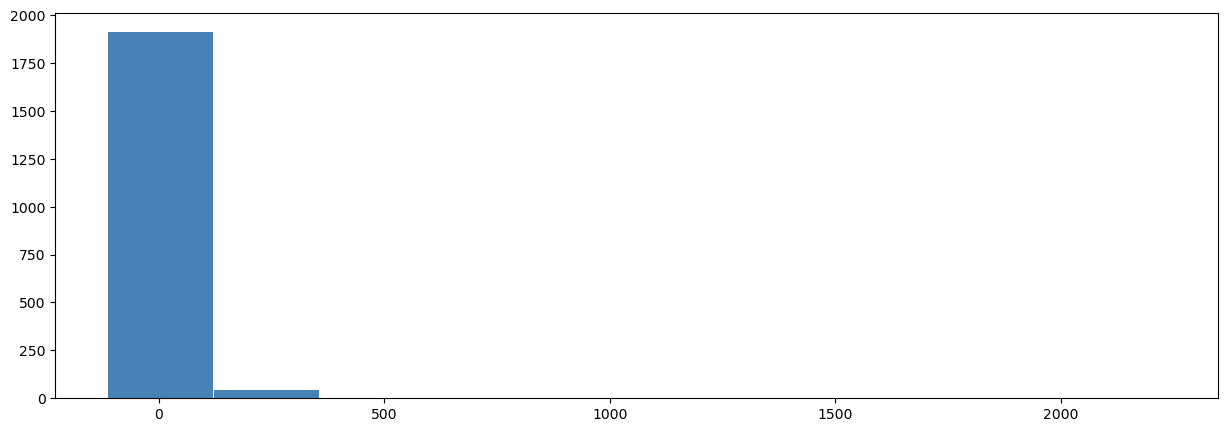

In [20]:
import matplotlib.pyplot as plt
 
# define histogram bin count
bins = 10
 
# plot size
plt.figure(figsize=(15, 5))
 
# histogram plot values and presentation
plt.hist(monetary_actual, bins, label='actual', histtype='bar', color='STEELBLUE', rwidth=0.99)
plt.hist( monetary_predicted, bins, label='predict', histtype='step', color='ORANGE',  rwidth=0.99)
 
# place legend on chart
plt.legend(loc='upper right')

In [22]:
from lifetimes.fitters.pareto_nbd_fitter import ParetoNBDFitter
 
lifetime_input_pd = filtered_cal# pull data into pandas from Spark dataframe
 
# instantiate & configure a ParetoNBD model 
lifetimes_model = ParetoNBDFitter(penalizer_coef=1.0)
 
# train the model
lifetimes_model.fit(lifetime_input_pd['frequency_cal'], lifetime_input_pd['recency_cal'], lifetime_input_pd['T_cal'])
 
# score the model
frequency_holdout_actual = lifetime_input_pd['frequency_holdout']
frequency_holdout_predicted = lifetimes_model.predict(lifetime_input_pd['duration_holdout'], lifetime_input_pd['frequency_cal'], lifetime_input_pd['recency_cal'], lifetime_input_pd['T_cal'])
mse = score_model(frequency_holdout_actual, frequency_holdout_predicted, 'mse')
 
print('MSE: {0}'.format(mse))

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\lifetimes\fitters\pareto_nbd_fitter.py:216: RuntimeWarning: invalid value encountered in log
  A_2 = logaddexp(-(r + x) * log(alpha + T) - s * log(beta + T), log(s) + log_A_0 - log(r_s_x))
C:\Users\Vivek Ketha\anaconda3\lib\site-packages\lifetimes\fitters\pareto_nbd_fitter.py:216: RuntimeWarning: invalid value encountered in logaddexp
  A_2 = logaddexp(-(r + x) * log(alpha + T) - s * log(beta + T), log(s) + log_A_0 - log(r_s_x))


NotImplementedError: Cannot apply ufunc <ufunc 'hyp2f1'> to mixed DataFrame and Series inputs.

In [24]:
clv_input_pd = filtered
 
# calculate the 1-year CLV for each customer
clv_input_pd['clv'] = (
  spend_model.customer_lifetime_value(
    lifetimes_model, #the model to use to predict the number of future transactions
    clv_input_pd['frequency'],
    clv_input_pd['recency'],
    clv_input_pd['T'],
    clv_input_pd['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
  )
)
 
clv_input_pd.head(10)

NameError: name 'spend_model' is not defined

In [28]:
# get hyperparameter setting
# l2_reg = space_eval(search_space, argmin)??
 
# instantiate and configure model
spend_model = GammaGammaFitter(penalizer_coef=0)
 
# fit the model
spend_model.fit(input_pd['frequency_cal'], input_pd['monetary_value_cal'])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer